Model Accuracy: 76.62%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       101
           1       0.81      0.69      0.75       100

    accuracy                           0.77       201
   macro avg       0.77      0.77      0.76       201
weighted avg       0.77      0.77      0.76       201



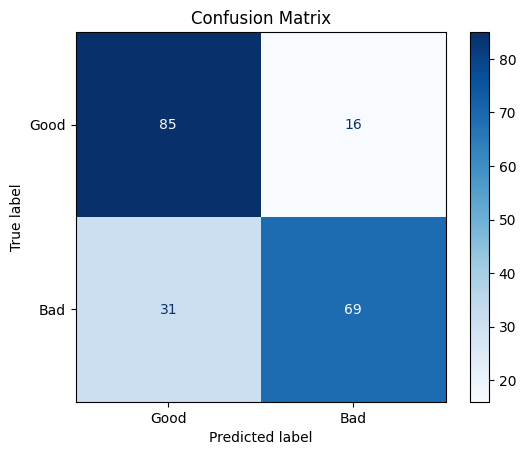

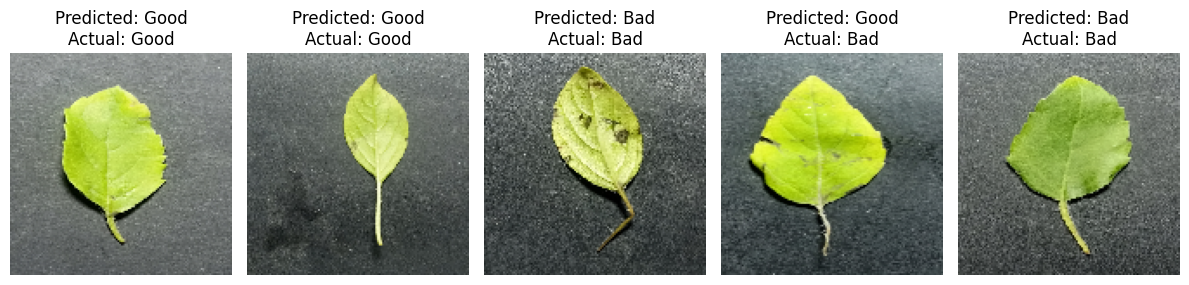

The leaf is classified as: Bad Leaf
Total Execution Time: 35.36 seconds


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time  # Import the time module

# import base directory which contain the dataset
BASE_DIR =""

IMAGE_SIZE = (128, 128)

def load_dataset(base_dir):
    images = []
    labels = []
    
    for label, class_dir in enumerate(['Good', 'Bad']):
        class_path = os.path.join(base_dir, class_dir)
        
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            
            img = cv2.imread(image_path)
            if img is not None:
                img_resized = cv2.resize(img, IMAGE_SIZE)
                images.append(img_resized)
                labels.append(label)
    
    return np.array(images), np.array(labels)

def predict_and_display_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return "Invalid image path!"
    
    img_resized = cv2.resize(img, IMAGE_SIZE)
    img_flattened = img_resized.reshape(1, -1)

    prediction = knn.predict(img_flattened)
    return "Good Leaf" if prediction[0] == 0 else "Bad Leaf"

def visualize_results(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

def display_test_results(X_test, y_test, y_pred, num_images=5):
    reshaped_images = X_test.reshape(X_test.shape[0], *IMAGE_SIZE, 3)
    indices = np.random.choice(range(len(y_test)), num_images, replace=False)
    
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(reshaped_images[idx], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Predicted: {'Good' if y_pred[idx] == 0 else 'Bad'}\nActual: {'Good' if y_test[idx] == 0 else 'Bad'}")
    plt.tight_layout()
    plt.show()

def print_results(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Record start time
start_time = time.time()

images, labels = load_dataset(BASE_DIR)
images_flattened = images.reshape(images.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print_results(y_test, y_pred)
visualize_results(y_test, y_pred)
display_test_results(X_test, y_test, y_pred)

# provide the path for test images
test_image_path = ""
result = predict_and_display_image(test_image_path)
print(f"The leaf is classified as: {result}")

# Record end time and print execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Total Execution Time: {execution_time:.2f} seconds")
